4/10/24

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
os.chdir('C:\\Users\\Vidhya\\Documents\\Python\\Desktop\\Edubridge\\Python\\Datasets')

In [3]:
hrt=pd.read_csv('heart.csv')
hrt

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
hrt.shape

(918, 12)

In [5]:
hrt.isna().sum()

Age               4
Sex               3
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#replacing null values in Age
hrt['Age'].fillna(np.mean(hrt['Age']),inplace=True)

In [7]:
#replaccing null values in Sex
gender_count=hrt['Sex'].value_counts()
gender_count

M    723
F    192
Name: Sex, dtype: int64

In [8]:
hrt['Sex'].fillna('M',inplace=True)

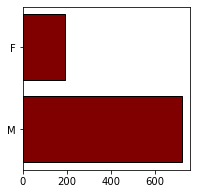

In [9]:
fig=plt.figure(figsize=(3,3))
plt.barh(gender_count.index,gender_count.values,color='maroon',edgecolor='black')
plt.show()

In [10]:
hrt.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [11]:
chestpains=hrt.ChestPainType.value_counts()
chestpains

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

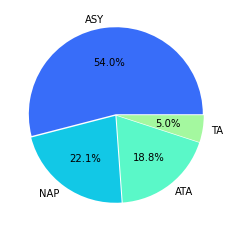

In [12]:
sns.set_palette('rainbow')
plt.pie(chestpains.values,labels=chestpains.index,autopct='%0.1f%%',explode=[0.01,0.01,0.01,0.01])
plt.show()

In [13]:
hrt.groupby('HeartDisease')['Cholesterol'].mean()

HeartDisease
0    227.121951
1    175.940945
Name: Cholesterol, dtype: float64

In [14]:
hrt.groupby('HeartDisease')['Cholesterol'].mean()

HeartDisease
0    227.121951
1    175.940945
Name: Cholesterol, dtype: float64

In [15]:
hrt.groupby('HeartDisease')['RestingBP'].mean()

HeartDisease
0    130.180488
1    134.185039
Name: RestingBP, dtype: float64

In [16]:
#encoding catgorical columns
from sklearn.preprocessing import LabelEncoder

In [17]:
encode=LabelEncoder()
hrt['Sex']=encode.fit_transform(hrt['Sex'])
hrt.ChestPainType=encode.fit_transform(hrt.ChestPainType)
hrt.RestingECG=encode.fit_transform(hrt.RestingECG)
hrt.ExerciseAngina=encode.fit_transform(hrt.ExerciseAngina)
hrt.ST_Slope=encode.fit_transform(hrt.ST_Slope)

In [18]:
X=hrt.iloc[:,:-1]
y=hrt.HeartDisease #HD

In [19]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.2)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model=LogisticRegression()
model.fit(X_tr,y_tr)

C:\Users\Vidhya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pr=model.predict(X_te)

In [23]:
y_pr

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [24]:
y_te

537    1
506    1
703    0
570    1
414    1
      ..
586    1
683    0
681    0
376    1
231    0
Name: HeartDisease, Length: 184, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score
print('The percentage accuracy of model is',accuracy_score(y_te,y_pr)*100)


#accuracy_score is to be used when variables are categorical
#accuracy_score tells abt how good is the model predicting the values similar to y_test values(actual values) i.e. predicting the right/nearest values
#E1 and E4
#below 80% or 85% the model is not good
#below 85% is still okay

The percentage accuracy of model is 86.95652173913044


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_te,y_pr)


#array([[E1,E2],[E3,E4]])
#diagonal elements (E1)-78(actually has HD and also predicted has HD) and (E4)-116(actually no HD and also predicted no HD) are rightly classified i.e. 78+116=194, these are predicted rightly
#diagonal elements (E2)-22(actually doesn't but predicted has HD) and (E3)-14(actually has but predicted no HD) are wrongly classified i.e. 22+14=36
#so E1+E2+E3+E4=230 values are predicted in the model irrespective of rightly or wrongly being predicted
#all of 230(X_te.shape) are predicted in my model
#194/230=0.8434 i.e. 84% of the values is predicted rightly

array([[70, 13],
       [11, 90]], dtype=int64)

In [27]:
X_te.shape

(184, 11)

In [28]:
hrt.HeartDisease.value_counts() #fairly balanced target class/output variable

1    508
0    410
Name: HeartDisease, dtype: int64

8/10/24

Decision Tree Classifier

In [29]:
#shld use Logistic Regression when target variable has only 2 output
#shld use Decision Tree Classifier when target variable has more than 2 output

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
depth=[1,2,3,4,5,6,7,8,9,10,11,12]
accuracies=[]
for i in depth:
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(X_tr,y_tr)
    y_pred=model.predict(X_te)
    accuracies.append(accuracy_score(y_te,y_pr)*100)

In [32]:
for i in range(len(depth)):
    print('Accuracy of decision Tree with depth',depth[i],'is',accuracies[i])

Accuracy of decision Tree with depth 1 is 86.95652173913044
Accuracy of decision Tree with depth 2 is 86.95652173913044
Accuracy of decision Tree with depth 3 is 86.95652173913044
Accuracy of decision Tree with depth 4 is 86.95652173913044
Accuracy of decision Tree with depth 5 is 86.95652173913044
Accuracy of decision Tree with depth 6 is 86.95652173913044
Accuracy of decision Tree with depth 7 is 86.95652173913044
Accuracy of decision Tree with depth 8 is 86.95652173913044
Accuracy of decision Tree with depth 9 is 86.95652173913044
Accuracy of decision Tree with depth 10 is 86.95652173913044
Accuracy of decision Tree with depth 11 is 86.95652173913044
Accuracy of decision Tree with depth 12 is 86.95652173913044


#Entropy and Gini are both measures of Impurity

In [33]:
#with Entropy
depth=[1,2,3,4,5,6,7,8,9,10,11,12]
accuracies=[]
for i in depth:
    model=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    model.fit(X_tr,y_tr)
    y_pred=model.predict(X_te)
    accuracies.append(accuracy_score(y_te,y_pr)*100)
    
for i in range(len(depth)):
    print('Accuracy of decision Tree with depth',depth[i],'is',accuracies[i])    

Accuracy of decision Tree with depth 1 is 86.95652173913044
Accuracy of decision Tree with depth 2 is 86.95652173913044
Accuracy of decision Tree with depth 3 is 86.95652173913044
Accuracy of decision Tree with depth 4 is 86.95652173913044
Accuracy of decision Tree with depth 5 is 86.95652173913044
Accuracy of decision Tree with depth 6 is 86.95652173913044
Accuracy of decision Tree with depth 7 is 86.95652173913044
Accuracy of decision Tree with depth 8 is 86.95652173913044
Accuracy of decision Tree with depth 9 is 86.95652173913044
Accuracy of decision Tree with depth 10 is 86.95652173913044
Accuracy of decision Tree with depth 11 is 86.95652173913044
Accuracy of decision Tree with depth 12 is 86.95652173913044


In [34]:
#with Gini
depth=[1,2,3,4,5,6,7,8,9,10,11,12]
accuracies=[]
for i in depth:
    model=DecisionTreeClassifier(criterion='gini',max_depth=i)
    model.fit(X_tr,y_tr)
    y_pred=model.predict(X_te)
    accuracies.append(accuracy_score(y_te,y_pr)*100)
    
for i in range(len(depth)):
    print('Accuracy of decision Tree with depth',depth[i],'is',accuracies[i])  

Accuracy of decision Tree with depth 1 is 86.95652173913044
Accuracy of decision Tree with depth 2 is 86.95652173913044
Accuracy of decision Tree with depth 3 is 86.95652173913044
Accuracy of decision Tree with depth 4 is 86.95652173913044
Accuracy of decision Tree with depth 5 is 86.95652173913044
Accuracy of decision Tree with depth 6 is 86.95652173913044
Accuracy of decision Tree with depth 7 is 86.95652173913044
Accuracy of decision Tree with depth 8 is 86.95652173913044
Accuracy of decision Tree with depth 9 is 86.95652173913044
Accuracy of decision Tree with depth 10 is 86.95652173913044
Accuracy of decision Tree with depth 11 is 86.95652173913044
Accuracy of decision Tree with depth 12 is 86.95652173913044


In [36]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_tr,y_tr)
y_pred=model.predict(X_te)
accuracy_score(y_te,y_pred)*100

72.82608695652173

16/10/24

Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

In [39]:
model=GaussianNB()
model.fit(X_tr,y_tr)
y_pred=model.predict(X_te)
accuracy_score(y_te,y_pred)*100

#till now this is the best model so far

86.95652173913044